# Compute performance metrics for the given Y and Y_score without sklearn

In [142]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [143]:
pwd

'C:\\Users\\Abhishek\\Downloads'

In [144]:
cd C:\Users\Abhishek\Downloads

C:\Users\Abhishek\Downloads


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [146]:
df=pd.read_csv('5_a.csv')

In [147]:
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [148]:
df['y~']=[1 if x>0.5 else 0 for x in df['proba']]

In [149]:
df.head()

,y,proba,y~
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [150]:
def true_positive(y_true,y_pred):
    tp=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==1:
            tp+=1
    return tp

In [151]:
def false_positive(y_true,y_pred):
    fp=0
    for yt,yp in zip(y_true,y_pred):
        if yp==1 and yt==0:
            fp+=1
    return fp

In [152]:
def true_negative(y_true,y_pred):
    tn=0
    for yt,yp in zip(y_true,y_pred):
        if yp==0 and yt==0:
            tn+=1
    return tn

In [153]:
def false_negative(y_true,y_pred):
    fn=0
    for yt,yp in zip(y_true,y_pred):
        if yt==1 and yp==0:
            fn+=1
    return fn

### 1.Printing the confusion matrix

In [154]:
print('True Positive :',true_positive(df['y'],df['y~']))
print('True Negative :',true_negative(df['y'],df['y~']))
print('False Positive :',false_positive(df['y'],df['y~']))
print('False Negative :',false_negative(df['y'],df['y~']))

True Positive : 10000
True Negative : 0
False Positive : 100
False Negative : 0


In [155]:
def recall(y_true,y_pred):
    tp=true_positive(y_true,y_pred)
    fn=false_negative(y_true,y_pred)
    return tp/(tp+fn)

In [156]:
def precision(y_true,y_pred):
    tp=true_positive(y_true,y_pred)
    fp=false_positive(y_true,y_pred)
    return tp/(tp+fp)

In [157]:
def f1_score(y_true,y_pred):
    pr=precision(y_true,y_pred)
    re=recall(y_true,y_pred)
    f1_scores=(2*(pr*re))/(pr+re)
    return f1_scores

## F1 Score

In [158]:
print('F1 Score :',f1_score(df['y'],df['y~']))

F1 Score : 0.9950248756218906


In [159]:
df.sort_values(['proba'],ascending=False,inplace=True)
df.head()
df = df.reset_index(drop=True)
df.head()

,y,proba,y~
0,1.0,0.899965,1
1,1.0,0.899828,1
2,1.0,0.899825,1
3,1.0,0.899812,1
4,1.0,0.899768,1


In [160]:
def cal_tpr_fpr(y_true,y_pred):
    tpr_list=[]
    fpr_list=[]
    for i in range(0,len(df['proba']),1):
        thres=df.loc[i,'proba']
        temp_prediction=[1 if x>thres else 0 for x in y_pred]
        tpr=true_positive(y_true,temp_prediction)/10000
        fpr=false_positive(y_true,temp_prediction)/100
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list,fpr_list

In [161]:
tpr=[]
fpr=[]
tpr_count=0
fpr_count=0
for i in range(0,len(df),100):
    thres=df.loc[i,'proba']
    #print(thres)
    df['y~']=df.proba.apply(lambda x: 1 if x>=thres else 0)
    tpr_count=len(df[(df['y']==1) & df['y~']==1])
    fpr_count=len(df[ (df['y']==0) & (df['y~']==1)])
    tpr.append(tpr_count/10000)
    fpr.append(fpr_count/100)

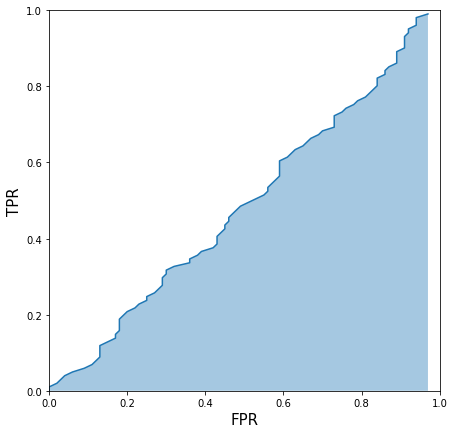

In [162]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr,tpr,alpha=0.4)
plt.plot(fpr,tpr)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show()

In [163]:
sums=0;
for i in range(1,len(tpr)):
    sums+=( (fpr[i]-fpr[i-1]) * (tpr[i]+tpr[i-1]) )/2
print(sums)
    

0.4580424999999999


### Roc Score

In [164]:
print('Roc Score is: ',sums)

Roc Score is:  0.4580424999999999


### Accuracy

In [165]:
TP=true_positive(df['y'],df['y~'])
TN=true_negative(df['y'],df['y~'])
FP=false_positive(df['y'],df['y~'])
FN=false_negative(df['y'],df['y~'])
acc=(TP+TN)/(TP+TN+FP+FN)
print(acc)

0.9808910891089109


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [166]:
df=pd.read_csv('5_b.csv')
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [167]:
df['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [168]:
df['y~']=df['proba'].apply(lambda x: 1 if x>0 else 0 )

### 1 Printing the confusion matrix

In [169]:
print('True Positive :',true_positive(df['y'],df['y~']))
print('True Negative :',true_negative(df['y'],df['y~']))
print('False Positive :',false_positive(df['y'],df['y~']))
print('False Negative :',false_negative(df['y'],df['y~']))

True Positive : 100
True Negative : 0
False Positive : 10000
False Negative : 0


### 2. F1 Score

In [170]:
print('F1 Score :',f1_score(df['y'],df['y~']))

F1 Score : 0.0196078431372549


In [171]:
df.sort_values(['proba'],ascending=False,inplace=True)
df=df.reset_index(drop=True)
df.head()

,y,proba,y~
0,1.0,0.595294,1
1,1.0,0.594808,1
2,1.0,0.592198,1
3,1.0,0.590171,1
4,1.0,0.588718,1


In [172]:
tpr=[]
fpr=[]
tpr_count=0
fpr_count=0
for i in range(0,len(df),100):
    thres=df.loc[i,'proba']
    df['y~']=df.proba.apply(lambda x: 1 if x>thres else 0)
    tpr_count=len(df[(df['y']==1) & (df['y~']==1)])
    fpr_count=len(df[(df['y']==0) & (df['y~']==1)])
    tpr.append(tpr_count/100)
    fpr.append(fpr_count/10000)

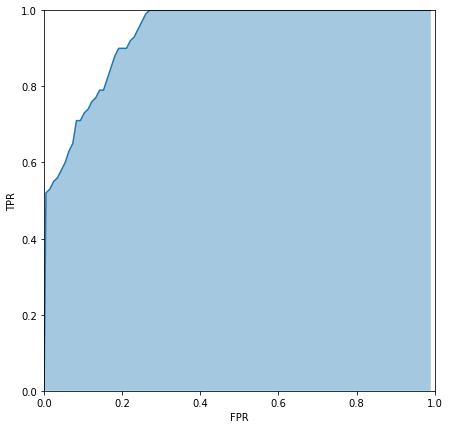

In [173]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr,tpr,alpha=0.4)
plt.plot(fpr,tpr)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


### Roc score

In [174]:
sums=0;
for i in range(1,len(tpr)):
    sums+=( (fpr[i]-fpr[i-1]) * (tpr[i]+tpr[i-1]) )/2
print('Roc score is: ',sums)
    

Roc score is:  0.9263


### Accuracy 

In [175]:
acc=(TP+TN)/(TP+TN+FN+FP)
print('accuracy is: ',acc)

accuracy is:  0.9808910891089109


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [176]:
df=pd.read_csv('5_c.csv')
df.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [177]:
A={}
key_list=[]
value_list=[]
value=0

for  thres in df['prob']:
    df['y~']=[1 if x>thres else 0 for x in df['prob']]
    value=((500*false_negative(df['y'],df['y~']))+(100*false_positive(df['y'],df['y~'])))
    key_list.append(thres)
    value_list.append(value)
    A[thres]=value
   


### Threshold value which give minimum score for metric A

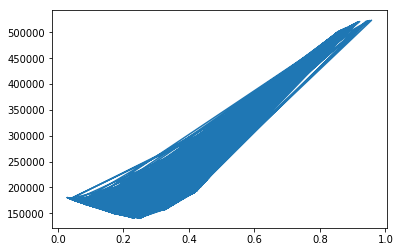

In [178]:


plt.plot(key_list,value_list)

plt.show()

In [179]:
inverse = [(value, key) for key, value in A.items()]
min_thres=min(inverse)[1]
print(min_thres)
print(A.get(min_thres))

0.22987164436159915
141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [180]:
df=pd.read_csv('5_d.csv')
df.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [181]:
def mean_square_error(y_true,y_pred):
    error=0
    for yt,yp in zip(y_true,y_pred):
        error+=(yt-yp)**2
    return error/len(y_true)

In [182]:
df.isnull().sum()

y       0
pred    0
dtype: int64

In [183]:
df.shape

(157200, 2)

### Computing Mean Square error

In [184]:
print(mean_square_error(df['y'],df['pred']))

177.16569974554707


In [195]:
def mean_absolute_percentage_error(y_true,y_pred):
    error=0
    avg_yt=np.mean(y_true)
    for yt,yp in zip(y_true,y_pred):
        error+=(np.abs(yt-yp)/avg_yt)
        #print(error)
    return (error/len(y_true))

### MAPE

In [196]:
print(mean_absolute_percentage_error(df['y'],df['pred']))

0.12912029940096315


In [ ]:
def r_square(y_true,y_pred):
    mean_true_value=np.mean(y_true)
    num=0
    deno=0
    ratio=0
    for yt,yp in zip(y_true,y_pred):
        num+=(yt-yp)**2
        deno+=(yt-mean_true_value)**2
        ratio=num/deno
    return 1-ratio

### R^2

In [ ]:
print(r_square(df['y'],df['pred']))